# t検定のサンプル
### GPAと出席率に関する　理系・文系比較　男女比較
２群間の平均値の差の検定の行います。
約500件の 架空の GPA,出席率のデータで「対応のない2標本t検定」を行う事例です。  
カテゴリには、理系・文系の別、また性別があります。

統計的仮説検定では、検定統計量の算出における手続き上、サンプルサイズが大きくなると P値は小さくなって「有意差あり」となる傾向があります。この例では、全体で500件、理系・文系の学生数はほぼ同数です。p値が小さいことよりも、どれぐらい平均値が異なるか・・ということの方が実務上は重要な情報になるかと思います。

ここで行っているのは、標本から母数の差を推定する作業です。もしこの500件が「ある大学の全数」であれば、記述統計的には「〇〇大学においてはGPAと出席率に関して、理系文系の差があり、また男女の差もある」ということになります。

ここで行っている仮設検定（推測統計）は、この500件を「世界中の学生の中からランダムに抽出したもの」として、つまり母数を世界の学生全体として、世の中一般の傾向として、理系と文系、あるいは男女に差があるかを推測している・・という話になります。

付記：t検定の仮定として、このデータは以下の仮定を満たすものと見做します
* データが正規分布に従っている（正規性の仮定）
* 二群の分散が等しい（等分散性の仮定）


In [ ]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
# サンプルデータの読み込み
df = pd.read_csv('https://raw.githubusercontent.com/koichi-inoue/DataScience/main/SampleForT-test.csv')
df

,学系,性別,GPA,出席率
0,理系,男,1.763,0.86
1,文系,男,1.118,0.48
2,理系,男,1.500,0.79
3,文系,男,2.258,0.68
4,文系,男,3.361,0.92
...,...,...,...,...
487,文系,女,2.055,0.54
488,理系,男,1.705,0.83
489,文系,男,2.808,0.88
490,理系,男,2.105,0.96


## 1. GPAを理系と文系で比較


In [ ]:
# 理系学生のGPAを df1 に抽出します
df1 = df.query( ' 学系 == "理系" ')['GPA']
df1.describe()

count    243.000000
mean       2.282263
std        0.733790
min        0.000000
25%        1.767000
50%        2.324000
75%        2.844000
max        3.870000
Name: GPA, dtype: float64

In [ ]:
# 文系学生のGPAを df2 に抽出します
df2 = df.query( ' 学系 == "文系" ')['GPA']
df2.describe()

count    249.000000
mean       1.996747
std        0.793851
min        0.254000
25%        1.400000
50%        1.912000
75%        2.556000
max        3.758000
Name: GPA, dtype: float64

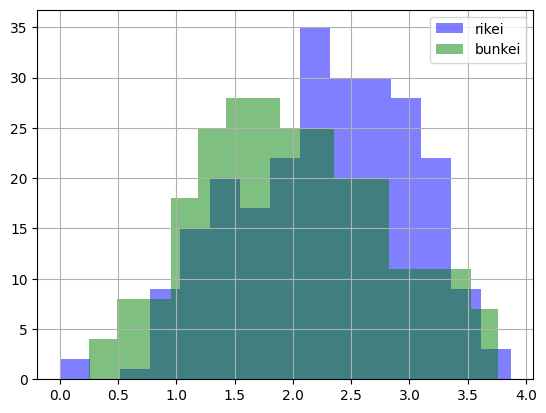

In [ ]:
#データをプロットして視覚的に確認
df1.hist(bins=15, color="blue", alpha=0.5, label=f"rikei" )
df2.hist(bins=15, color="green",alpha=0.5, label=f"bunkei" )
plt.legend()

In [ ]:
#統計ライブラリの関数を利用するために DataFrame を NumPy配列（ndarray）に変換します。
d1 = df1.values
d2 = df2.values

In [ ]:
# 対応のないt検定：scipy.stats ＞ ttest_ind()
t, p = stats.ttest_ind(d1, d2, equal_var=True, alternative='two-sided')

print(f'p値 = {p:.5f}')
print(f't値 = {t:.3f}')

p値 = 0.00004
t値 = 4.140


実行例の場合、p<0.05 で「有意差あり」（帰無仮説は棄却）と判定されます。

## 2. GPAを性別で比較
データの抽出から検定までを一気に書きます。

p値 = 0.00000
t値 = -6.726


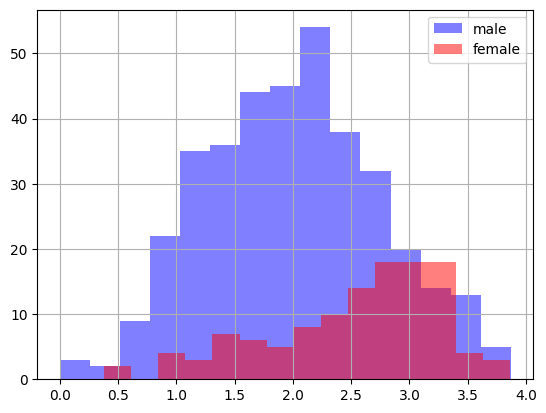

In [ ]:
df3 = df.query( ' 性別 == "男" ')['GPA']
df4 = df.query( ' 性別 == "女" ')['GPA']

df3.hist(bins=15, color="blue", alpha=0.5, label=f"male" )
df4.hist(bins=15, color="red", alpha=0.5, label=f"female" )
plt.legend()

d3 = df3.values
d4 = df4.values

t, p = stats.ttest_ind(d3, d4, equal_var=True, alternative='two-sided')

print(f'p値 = {p:.5f}')
print(f't値 = {t:.3f}')

## 3. 出席率を理系・文系で比較
上に倣って、自身でコードを書いてみましょう

## 4. 出席率を性別で比較
上に倣って、自身でコードを書いてみましょう